In [1]:
import re
import math
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import matplotlib
from scipy import optimize
from lmfit import Model
from lmfit.models import GaussianModel, ExpressionModel, ExponentialModel

def fnc_lin(x, a, b):
    return a*x + b

def fnc_quad(x, a, b, c):
    return a*x*x + b*x + c

def fnc_cub(x, a, b, c, d):
    return a*x*x*x + b*x*x + c*x + d

def fnc_log_b(x, a, b, c, d=10):
    return a*np.log(b*x)/np.log(d) + c

def fnc_log10(x, a, b, c):
    return fnc_log_b(x, a, b, c, 10)

def fnc_log2(x, a, b, c):
    return fnc_log_b(x, a, b, c, 2)

def fnc_loge(x, a, b, c):
    return fnc_log_b(x, a, b, c, 2.71828)

def fnc_lognp(x, a, b, c):
    return a * np.log(b * x) + c

def fnc_exp(x, a, b, c):
    return a * np.exp(-b * x) + c

def fnc_sqrt(x, a, b, c):
    return a * np.square(b * x) + c

def fnc_pow(x, a, b, c, d):
    return a * np.power(b * x, c) + d

def fnc_pow2(x, a, b, c):
    return a * np.power(b * x, 0.79015402) + c

def fnc_gauss(x, a, b, c):
    return (a / (np.sqrt(2*np.pi) * c)) * np.exp(-(x-b)**2 / (2*c**2))

def goodness_of_fit(fnc, params, x_data, y_data, y_avg):
    y_fit = np.array([fnc(x, *params) for x in x_data])
    ss_res = np.sum((y_data - y_fit)**2)
    ss_tot = np.sum((y_data - y_avg)**2)
    rsqr = 1 - ss_res/ss_tot
    return rsqr

def fnc_name(fnm):
    m = re.match(r'^<function ([\w]+?) .*>$', fnm)
    return m.group(1) if m else fnm

def curve_fit(x_data, y_data, fnc=fnc_lin, p0=[0,0], fname='plot'):
    x_data = np.array(x_data)
    y_data = np.array(y_data)
    y_avg = np.mean(y_data)
    
    # Scipy curve fitting
#     params, params_covariance = optimize.curve_fit(fnc, x_data, y_data, p0=p0)#, method='lm')
#     print(params)
#     print(params_covariance)
#     print(np.sqrt(np.diag(params_covariance)))
#     rsqr = goodness_of_fit(fnc, params, x_data, y_data, y_avg)
#     print('R2: %s' % rsqr)
        
    # lmfit curve fitting + fit test
    # https://lmfit.github.io/lmfit-py/model.html
    lm_par = ['a', 'b', 'c', 'd', 'e', 'f']
    gmodel = Model(fnc, nan_policy='propagate')
    kwargs = {lm_par[i]:p0[i] for i in range(len(p0))}
    result = gmodel.fit(y_data, x=x_data, **kwargs)
    print(result.fit_report())
    #print(result.conf_interval())
    #print(result.ci_report())
    #print(result.eval_uncertainty())
    #plt.figure(figsize=(6, 4))
    #result.plot_residuals()
    params = [result.best_values[lm_par[i]] for i in range(len(p0))]
    rsqr = goodness_of_fit(fnc, params, x_data, y_data, y_avg)
    print('R2: %s' % rsqr)
    
    #font = {'family' : 'normal', 'weight': 'normal', 'size'   : 14}
    #matplotlib.rc('font', **font)
    
    fig, ax = pyplot.subplots(figsize=(6, 4))
    label = 'Fitted function %s' % fnc_name(str(fnc))
    # plt.figure(figsize=(6, 4))
    
    plt.scatter(x_data, y_data, label='plot', s=2)
    plt.plot(x_data, fnc(x_data, *params), label=label, color='red')
    plt.legend(loc='best')  # plt.tick_params(labelsize=14)
    ax.set_xlabel("h(-D)")
    ax.set_ylabel("time [s]")
    
    #plt.show()
    plt.rcParams.update({'font.size': 13})
    plt.savefig("%s.pdf" % fname,bbox_inches='tight', dpi=600)
    plt.savefig("%s.png" % fname,bbox_inches='tight', dpi=600)
    

Fitting model <function fnc_lin at 0x10413d488> [1, 1]
[[Model]]
    Model(fnc_lin)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 13
    # variables        = 2
    chi-square         = 72.2526480
    reduced chi-square = 6.56842255
    Akaike info crit   = 26.2978551
    Bayesian info crit = 27.4277538
[[Variables]]
    a:  9.1940e-04 +/- 2.0824e-04 (22.65%) (init = 1)
    b:  2.22265351 +/- 0.93215771 (41.94%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.647

R2: 0.6392591307988664
Fitting model <function fnc_pow2 at 0x10fd2f488> [2, 2, 2]
[[Model]]
    Model(fnc_pow2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 59
    # data points      = 13
    # variables        = 3
    chi-square         = 53.0587915
    reduced chi-square = 5.30587915
    Akaike info crit   = 24.2838658
    Bayesian info crit = 25.9787139
[[Variables]]
    a:  0.14263573 +/-        nan 

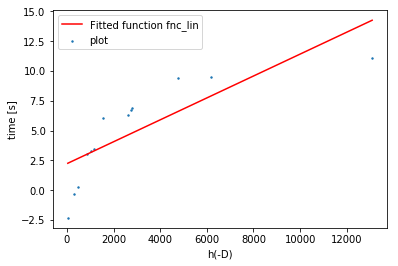

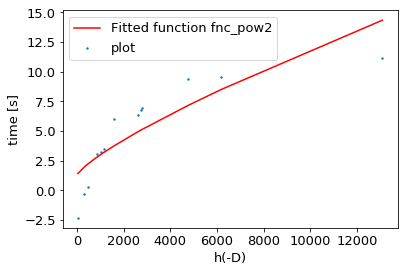

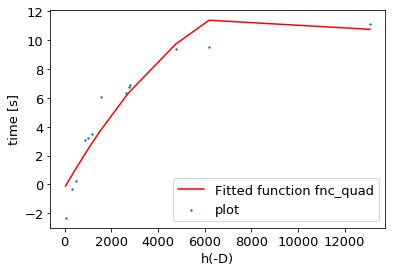

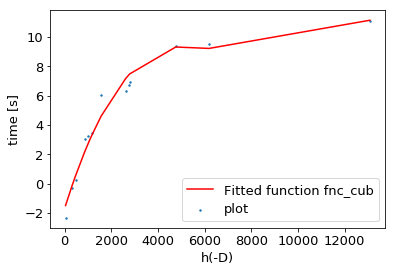

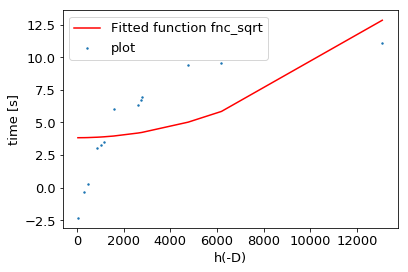

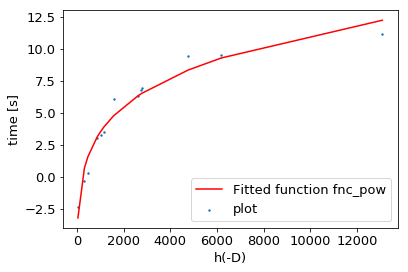

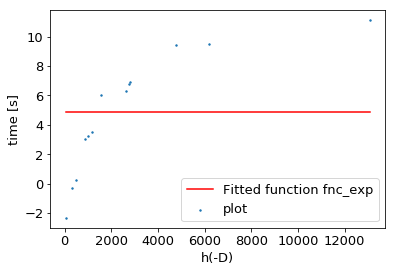

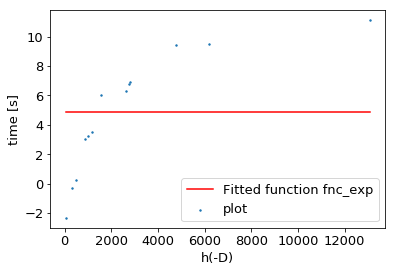

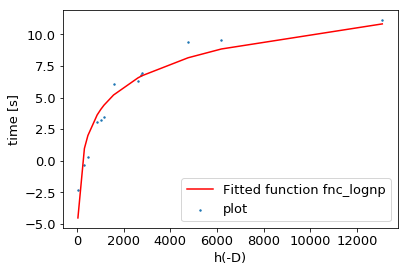

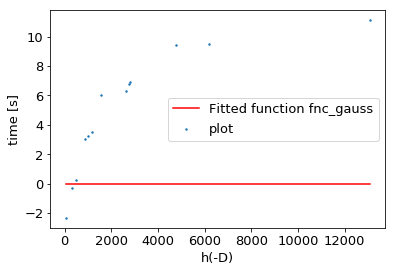

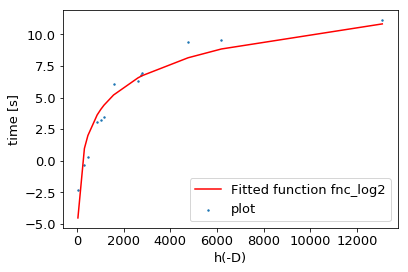

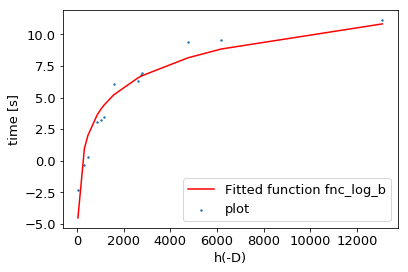

In [2]:
all_models = [(fnc_lin, [1,1]), (fnc_pow2, [2,2,2]), (fnc_quad, [1,1,1]), (fnc_cub, [1,1,1,1]),
              (fnc_sqrt, [1,1,1]), (fnc_pow, [1,1,1,0]), (fnc_exp, [1,1,1]), (fnc_exp, [2,2,2]), 
              (fnc_lognp, [1,1,1]), (fnc_gauss, [1,1,1]), (fnc_log2, [2,2,2]), (fnc_log_b, [2,2,2,2])]

# large data from paper
#x_data = [2112, 6320, 20203, 56282, 181584, 521304,     100000, 200000, 300000,   11280, 54706]
#y_data = [156, 1650, 23400, 195000, 2160000, 20600000,  98800, 472000, 1240000,   26000, 61000]

# smaller data
x_data = [1020, 468, 40,  2760,  13088,  1158,  2616, 318,  864,  1568,  2790,   4764,  6192]
y_data = [9.5,  1.2, 0.2, 108.3, 2214,   11.2,  80,   0.8,  8.3,  66.2,  121.3,  678.8, 739  ]

srt = sorted(zip(x_data, y_data), key=lambda x: x[0])
x_data = [x[0] for x in srt]
y_data = [x[1] for x in srt]

for cmod in all_models:
    fnc, p0 = cmod    
    print('='*80)
    print('Fitting model %s %s' % (fnc, p0))
    cydata = [math.log(x, 2) for x in y_data]
    curve_fit(x_data, cydata, fnc, p0, '/tmp/approx_%s' % fnc_name(str(fnc)))

In [3]:
sorted(zip(x_data, y_data), key=lambda x: x[0])

[(40, 0.2),
 (318, 0.8),
 (468, 1.2),
 (864, 8.3),
 (1020, 9.5),
 (1158, 11.2),
 (1568, 66.2),
 (2616, 80),
 (2760, 108.3),
 (2790, 121.3),
 (4764, 678.8),
 (6192, 739),
 (13088, 2214)]

In [4]:
def cost_function(cn):
    # Approximated from https://arxiv.org/pdf/0903.2785.pdf by log function in h(-D) vs. log(time)
    r = (1.83947889 * math.log(cn * 18.828747, 2) - 19.0112316)
    return r


In [5]:
2**cost_function(5000)

2668.2920486406447

In [6]:
import logging
import coloredlogs

logger = logging.getLogger(__name__)
coloredlogs.CHROOT_FILES = []
coloredlogs.install(level=logging.INFO, use_chroot=False)

In [7]:
sum(map(lambda x:  x, [0,1,0,0,1]))

2